Data from https://data.cityofnewyork.us/api/odata/v4/hvrh-b6nb
    
Web URL : https://data.cityofnewyork.us/Transportation/2016-Green-Taxi-Trip-Data/hvrh-b6nb

## Sample Data

!head -1 NYC.csv > NYC_sample.csv
<br/>
!perl -ne 'print if (rand() < 0.07)' NYC.csv >> NYC_sample.csv

In [5]:
!pip install torch==0.4.1 torchvision fastai==0.7.0 scikit-learn==0.21.3 geopandas

     |████████████████████████████████| 519.5MB 1.7MB/s eta 0:00:01    |██▏                             | 34.9MB 736kB/s eta 0:10:58     |███▎                            | 53.7MB 731kB/s eta 0:10:37     |██████▉                         | 111.5MB 2.2MB/s eta 0:03:08     |████████▎                       | 134.0MB 483kB/s eta 0:13:17     |██████████▏                     | 165.7MB 602kB/s eta 0:09:47     |████████████▍                   | 201.9MB 707kB/s eta 0:07:29     |█████████████▊                  | 222.2MB 612kB/s eta 0:08:06     |████████████████▊               | 272.3MB 3.1MB/s eta 0:01:19     |█████████████████▎              | 281.0MB 723kB/s eta 0:05:30     |█████████████████████▏          | 343.5MB 1.2MB/s eta 0:02:21     |████████████████████████████▎   | 459.8MB 613kB/s eta 0:01:38     |█████████████████████████████▍  | 477.0MB 734kB/s eta 0:00:58
  Using cached https://files.pythonhosted.org/packages/1c/32/cb0e4c43cd717da50258887b088471568990b5a749784c465a8a1962e021/torchvisi

  Using cached https://files.pythonhosted.org/packages/97/36/1af447160f713d72f35dd7e749788367b7a13285c4af2fbd675128aa4e99/Shapely-1.6.4.post2-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/1d/a8/23c45ca0fb02771c0e7cad5b4cf3de380751e34fb34bbe802541515544ad/pyproj-2.4.2.post1-cp37-cp37m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/eb/b5/973cb6d5e6c2d3bdc71411e78b388387c04c658c76d73aee63db8da7eb58/Fiona-1.8.13-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/11/e0/1264990c559fb945cfb6664742001608e1ed8359eeec6722830ae085062b/sentencepiece-0.1.85-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/e3/76/7a2c9094547ee592f9f43f651ab824aa6599af5e1456250c3f4cc162aece/mizani-0.6.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/e5/b6/1ed2eb03989ae574584664985367ba70cd9cf8b32ee8cad0e8aaeac819f3/descartes-1.1.0-py3-none-a

Failed to build bcolz
ERROR: torchvision 0.5.0 has requirement torch==1.4.0, but you'll have torch 0.4.1 which is incompatible.
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 0.4.1 which is incompatible.
ERROR: Could not install packages due to an EnvironmentError: [Errno 13] Permission denied: '/home/johnb/anaconda3/lib/python3.7/site-packages/torch-0.4.1.dist-info'
Consider using the `--user` option or check the permissions.



In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from fastai.structured import *
from sklearn import metrics
from fastai.imports import *
from sklearn.ensemble import RandomForestRegressor
import geopandas as gpd

ModuleNotFoundError: No module named 'fastai'

In [2]:
sns.set(rc={'figure.figsize':(13,8)})


In [3]:
df = pd.read_csv("NYC_sample.csv")

In [4]:
df.columns

Index(['VendorID', 'lpep_pickup_datetime', 'Lpep_dropoff_datetime',
       'Store_and_fwd_flag', 'RateCodeID', 'Pickup_longitude',
       'Pickup_latitude', 'Dropoff_longitude', 'Dropoff_latitude',
       'Passenger_count', 'Trip_distance', 'Fare_amount', 'Extra', 'MTA_tax',
       'Tip_amount', 'Tolls_amount', 'Ehail_fee', 'improvement_surcharge',
       'Total_amount', 'Payment_type', 'Trip_type ', 'PULocationID',
       'DOLocationID'],
      dtype='object')

In [5]:
len(df)

1148725

In [6]:
df.head().T

0                       1  \
VendorID                                    2                       2   
lpep_pickup_datetime   05/07/2016 02:25:05 AM  05/07/2016 02:21:26 AM   
Lpep_dropoff_datetime  05/07/2016 02:38:19 AM  05/07/2016 02:43:46 AM   
Store_and_fwd_flag                          N                       N   
RateCodeID                                  1                       1   
Pickup_longitude                     -73.9589                -73.9234   
Pickup_latitude                       40.7168                 40.7069   
Dropoff_longitude                    -73.9324                -74.0163   
Dropoff_latitude                      40.7079                 40.7112   
Passenger_count                             6                       1   
Trip_distance                            2.25                    6.34   
Fare_amount                                11                      22   
Extra                                     0.5                     0.5   
MTA_tax                                   0.5                     0.5   
Tip_amount                                  0                       1   
Tolls_amount                                0                       0   
Ehail_fee                                 NaN                     NaN   
improvement_surcharge                     0.3                     0.3   
Total_amount                             12.3                    24.3   
Payment_type                                1                       1   
Trip_type                                   1                       1   
PULocationID                              NaN                     NaN   
DOLocationID                              NaN                     NaN   

                                            2                       3  \
VendorID                                    2                       2   
lpep_pickup_datetime   05/08/2016 12:54:22 AM  05/08/2016 12:51:46 AM   
Lpep_dropoff_datetime  05/08/2016 01:10:20 AM  05/08/2016 01:04:24 AM   
Store_and_fwd_flag                          N                       N   
RateCodeID                                  1                       1   
Pickup_longitude                      -73.956                -73.9156   
Pickup_latitude                       40.8047                 40.7433   
Dropoff_longitude                    -73.9173                -73.9135   
Dropoff_latitude                      40.8244                 40.7657   
Passenger_count                             1                       1   
Trip_distance                             3.3                    2.21   
Fare_amount                              13.5                    10.5   
Extra                                     0.5                     0.5   
MTA_tax                                   0.5                     0.5   
Tip_amount                                  0                       0   
Tolls_amount                                0                       0   
Ehail_fee                                 NaN                     NaN   
improvement_surcharge                     0.3                     0.3   
Total_amount                             14.8                    11.8   
Payment_type                                2                       1   
Trip_type                                   1                       1   
PULocationID                              NaN                     NaN   
DOLocationID                              NaN                     NaN   

                                            4  
VendorID                                    1  
lpep_pickup_datetime   05/07/2016 04:19:06 PM  
Lpep_dropoff_datetime  05/07/2016 04:24:20 PM  
Store_and_fwd_flag                          N  
RateCodeID                                  1  
Pickup_longitude                     -73.9391  
Pickup_latitude                       40.8054  
Dropoff_longitude                    -73.9538  
Dropoff_latitude                      40.8063  
Passenger_count                             1  
Trip_dista

### Handling Missing Values


In [7]:

na_counts = pd.DataFrame(df.isna().sum()/len(df)) 
na_counts.columns = ["null_row_pct"]
na_counts[na_counts.null_row_pct > 0].sort_values(by = "null_row_pct", ascending=False)


null_row_pct
Ehail_fee              1.000000
PULocationID           0.550597
DOLocationID           0.550597
Pickup_longitude       0.449403
Pickup_latitude        0.449403
Dropoff_longitude      0.449403
Dropoff_latitude       0.449403
Trip_type              0.000030

In [8]:
na_counts.loc["Pickup_longitude"]["null_row_pct"] + na_counts.loc["PULocationID"]["null_row_pct"]

1.0

In [9]:
df = df[~(
    (df.Dropoff_latitude.isna()) & (df.DOLocationID.isna())
)]

In [10]:
len(df)

1148725

In [11]:
df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime, errors = 'ignore')
df.Lpep_dropoff_datetime = pd.to_datetime(df.Lpep_dropoff_datetime, errors = 'ignore' )


In [12]:
pd.option_context("display.max_rows", 1000)
pd.option_context("display.max_columns", 1000)

In [13]:

df["trip_duration"] = np.log((df.Lpep_dropoff_datetime - df.lpep_pickup_datetime).dt.seconds + 1)

drop_columns = [
    "Trip_type ", "Ehail_fee", "Extra", "Payment_type", "Total_amount", 
    "improvement_surcharge", "Tolls_amount", "Tip_amount", 
    "MTA_tax", "VendorID", "RateCodeID", "Store_and_fwd_flag", 
    "Fare_amount", "Lpep_dropoff_datetime", 'Trip_type ', 'Passenger_count'
]

df.drop(columns=drop_columns, inplace=True)

df.tail().T


1148720              1148721  \
lpep_pickup_datetime  2016-05-07 16:24:05  2016-05-07 16:20:59   
Pickup_longitude                 -73.9457             -73.9461   
Pickup_latitude                   40.8075              40.6802   
Dropoff_longitude                -73.9253             -73.9492   
Dropoff_latitude                   40.818              40.6951   
Trip_distance                         1.6                    1   
PULocationID                          NaN                  NaN   
DOLocationID                          NaN                  NaN   
trip_duration                     6.70073              5.78383   

                                  1148722              1148723  \
lpep_pickup_datetime  2016-05-07 16:20:50  2016-05-07 02:02:17   
Pickup_longitude                 -73.9458              -73.963   
Pickup_latitude                   40.8076              40.7119   
Dropoff_longitude                -73.9572             -73.9174   
Dropoff_latitude                   40.806              40.6987   
Trip_distance                         0.9                 3.37   
PULocationID                          NaN                  NaN   
DOLocationID                          NaN                  NaN   
trip_duration                     5.56068              6.96224   

                                  1148724  
lpep_pickup_datetime  2016-05-07 02:24:26  
Pickup_longitude                  -73.962  
Pickup_latitude                    40.716  
Dropoff_longitude                -73.9569  
Dropoff_latitude                  40.6736  
Trip_distance                        3.31  
PULocationID                          NaN  
DOLocationID                          NaN  
trip_duration                     6.52796

In [14]:
add_datepart(df, 'lpep_pickup_datetime', time=True)
df.tail().T

1148720     1148721     1148722  \
Pickup_longitude                        -73.9457    -73.9461    -73.9458   
Pickup_latitude                          40.8075     40.6802     40.8076   
Dropoff_longitude                       -73.9253    -73.9492    -73.9572   
Dropoff_latitude                          40.818     40.6951      40.806   
Trip_distance                                1.6           1         0.9   
PULocationID                                 NaN         NaN         NaN   
DOLocationID                                 NaN         NaN         NaN   
trip_duration                            6.70073     5.78383     5.56068   
lpep_pickup_datetimeYear                    2016        2016        2016   
lpep_pickup_datetimeMonth                      5           5           5   
lpep_pickup_datetimeWeek                      18          18          18   
lpep_pickup_datetimeDay                        7           7           7   
lpep_pickup_datetimeDayofweek                  5           5           5   
lpep_pickup_datetimeDayofyear                128         128         128   
lpep_pickup_datetimeIs_month_end           False       False       False   
lpep_pickup_datetimeIs_month_start         False       False       False   
lpep_pickup_datetimeIs_quarter_end         False       False       False   
lpep_pickup_datetimeIs_quarter_start       False       False       False   
lpep_pickup_datetimeIs_year_end            False       False       False   
lpep_pickup_datetimeIs_year_start          False       False       False   
lpep_pickup_datetimeHour                      16          16          16   
lpep_pickup_datetimeMinute                    24          20          20   
lpep_pickup_datetimeSecond                     5          59          50   
lpep_pickup_datetimeElapsed           1462638245  1462638059  1462638050   

                                         1148723     1148724  
Pickup_longitude                         -73.963     -73.962  
Pickup_latitude                          40.7119      40.716  
Dropoff_longitude                       -73.9174    -73.9569  
Dropoff_latitude                         40.6987     40.6736  
Trip_distance                               3.37        3.31  
PULocationID                                 NaN         NaN  
DOLocationID                                 NaN         NaN  
trip_duration                            6.96224     6.52796  
lpep_pickup_datetimeYear                    2016        2016  
lpep_pickup_datetimeMonth                      5           5  
lpep_pickup_datetimeWeek                      18          18  
lpep_pickup_datetimeDay                        7           7  
lpep_pickup_datetimeDayofweek                  5           5  
lpep_pickup_datetimeDayofyear                128         128  
lpep_pickup_datetimeIs_month_end           False       False  
lpep_pickup_datetimeIs_month_start         False       False  
lpep_pickup_datetimeIs_quarter_end         False       False  
lpep_pickup_datetimeIs_quarter_start       False       False  
lpep_pickup_datetimeIs_year_end            False       False  
lpep_pickup_datetimeIs_year_start          False       False  
lpep_pickup_datetimeHour                       2           2  
lpep_pickup_datetimeMinute                     2          24  
lpep_pickup_datetimeSecond                    17          26  
lpep_pickup_datetimeElapsed           1462586537  1462587866

In [35]:
def haversine(lat1, lon1, lat2, lon2):
    R = 3958.76 # Earth radius in miles
    
    dLat, dLon, lat1, lat2 = np.radians(lat2 - lat1), np.radians(lon2 - lon1), \
    np.radians(lat1), np.radians(lat2)
    a =  np.sin(dLat/2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dLon/2) ** 2
    c = 2*np.arcsin(np.sqrt(a))
    
    return R * c

theta1 = np.radians(-28.904)
theta2 = np.radians(28.904)
R1 = np.array([[np.cos(theta1), np.sin(theta1)], [-np.sin(theta1), np.cos(theta1)]])
R2 = np.array([[np.cos(theta2), np.sin(theta2)], [-np.sin(theta2), np.cos(theta2)]])

def manhattan_dist(lat1, lon1, lat2, lon2):
    p = np.stack([lat1, lon1], axis = 1)
    d = np.stack([lat2, lon2], axis = 1)
    pT = R1 @ p.T  
    dT = R1 @ d.T  

    vT = np.stack((pT[0,:], dT[1,:]))
    v = R2 @ vT
    return (haversine(p.T[0], p.T[1], v[0], v[1]) + haversine(v[0], v[1], d.T[0], d.T[1]))

In [36]:
df["haversine_dist"] = haversine(df["Pickup_latitude"], df["Pickup_longitude"], \
                                     df["Dropoff_latitude"], df["Dropoff_longitude"])

df["manhattan_dist"] = manhattan_dist(df["Pickup_latitude"], df["Pickup_longitude"], \
                                          df["Dropoff_latitude"], df["Dropoff_longitude"])


In [37]:
train_cats(df)
df.tail().T

1110646     1110647     1110648  \
Pickup_longitude                        -73.9457    -73.9461    -73.9458   
Pickup_latitude                          40.8075     40.6802     40.8076   
Dropoff_longitude                       -73.9253    -73.9492    -73.9572   
Dropoff_latitude                          40.818     40.6951      40.806   
Trip_distance                                1.6           1         0.9   
PULocationID                                  41          61          41   
DOLocationID                                 168          17          41   
trip_duration                            6.70073     5.78383     5.56068   
lpep_pickup_datetimeYear                    2016        2016        2016   
lpep_pickup_datetimeMonth                      5           5           5   
lpep_pickup_datetimeWeek                      18          18          18   
lpep_pickup_datetimeDay                        7           7           7   
lpep_pickup_datetimeDayofweek                  5           5           5   
lpep_pickup_datetimeDayofyear                128         128         128   
lpep_pickup_datetimeIs_month_end           False       False       False   
lpep_pickup_datetimeIs_month_start         False       False       False   
lpep_pickup_datetimeIs_quarter_end         False       False       False   
lpep_pickup_datetimeIs_quarter_start       False       False       False   
lpep_pickup_datetimeIs_year_end            False       False       False   
lpep_pickup_datetimeIs_year_start          False       False       False   
lpep_pickup_datetimeHour                      16          16          16   
lpep_pickup_datetimeMinute                    24          20          20   
lpep_pickup_datetimeSecond                     5          59          50   
lpep_pickup_datetimeElapsed           1462638245  1462638059  1462638050   
pickup_borough                         Manhattan    Brooklyn   Manhattan   
dropoff_borough                            Bronx    Brooklyn   Manhattan   
haversine_dist                           1.28942     1.04241    0.605765   
manhattan_dist                            1.3344     1.20788    0.878309   

                                         1110649     1110650  
Pickup_longitude                         -73.963     -73.962  
Pickup_latitude                          40.7119      40.716  
Dropoff_longitude                       -73.9174    -73.9569  
Dropoff_latitude                         40.6987     40.6736  
Trip_distance                               3.37        3.31  
PULocationID                                 256         255  
DOLocationID                                  36          61  
trip_duration                            6.96224     6.52796  
lpep_pickup_datetimeYear                    2016        2016  
lpep_pickup_datetimeMonth                      5           5  
lpep_pickup_datetimeWeek                      18          18  
lpep_pickup_datetimeDay                        7           7  
lpep_pickup_datetimeDayofweek                  5           5  
lpep_pickup_datetimeDayofyear                128         128  
lpep_pickup_datetimeIs_month_end           False       False  
lpep_pickup_datetimeIs_month_start         False       False  
lpep_pickup_datetimeIs_quarter_end         False       False  
lpep_pickup_datetimeIs_quarter_start       False       False  
lpep_pickup_datetimeIs_year_end            False       False  
lpep_pickup_datetimeIs_year_start          False       False  
lpep_pickup_datetimeHour                       2           2  
lpep_pickup_datetimeMinute                     2          24  
lpep_pickup_datetimeSecond                    17          26  
lpep_pickup_datetimeElapsed           1462586537  1462587866  
pickup_borough                          Brooklyn    Brooklyn  
dropoff_borough                         Brooklyn    Brooklyn  
haversine_dist                           2.55067     2.94094  
manhattan_dist                           4.09625     3.50392

In [38]:
tdf, y, nas = proc_df(df, 'trip_duration')
nas

{'Pickup_longitude': -73.94575026755162,
 'Pickup_latitude': 40.74423471780132,
 'Dropoff_longitude': -73.94471740722656,
 'Dropoff_latitude': 40.74542236328125,
 'haversine_dist': 1.4892974700507058,
 'manhattan_dist': 1.9368229889000521}

In [39]:
df.tail().T

1110646     1110647     1110648  \
Pickup_longitude                        -73.9457    -73.9461    -73.9458   
Pickup_latitude                          40.8075     40.6802     40.8076   
Dropoff_longitude                       -73.9253    -73.9492    -73.9572   
Dropoff_latitude                          40.818     40.6951      40.806   
Trip_distance                                1.6           1         0.9   
PULocationID                                  41          61          41   
DOLocationID                                 168          17          41   
trip_duration                            6.70073     5.78383     5.56068   
lpep_pickup_datetimeYear                    2016        2016        2016   
lpep_pickup_datetimeMonth                      5           5           5   
lpep_pickup_datetimeWeek                      18          18          18   
lpep_pickup_datetimeDay                        7           7           7   
lpep_pickup_datetimeDayofweek                  5           5           5   
lpep_pickup_datetimeDayofyear                128         128         128   
lpep_pickup_datetimeIs_month_end           False       False       False   
lpep_pickup_datetimeIs_month_start         False       False       False   
lpep_pickup_datetimeIs_quarter_end         False       False       False   
lpep_pickup_datetimeIs_quarter_start       False       False       False   
lpep_pickup_datetimeIs_year_end            False       False       False   
lpep_pickup_datetimeIs_year_start          False       False       False   
lpep_pickup_datetimeHour                      16          16          16   
lpep_pickup_datetimeMinute                    24          20          20   
lpep_pickup_datetimeSecond                     5          59          50   
lpep_pickup_datetimeElapsed           1462638245  1462638059  1462638050   
pickup_borough                         Manhattan    Brooklyn   Manhattan   
dropoff_borough                            Bronx    Brooklyn   Manhattan   
haversine_dist                           1.28942     1.04241    0.605765   
manhattan_dist                            1.3344     1.20788    0.878309   

                                         1110649     1110650  
Pickup_longitude                         -73.963     -73.962  
Pickup_latitude                          40.7119      40.716  
Dropoff_longitude                       -73.9174    -73.9569  
Dropoff_latitude                         40.6987     40.6736  
Trip_distance                               3.37        3.31  
PULocationID                                 256         255  
DOLocationID                                  36          61  
trip_duration                            6.96224     6.52796  
lpep_pickup_datetimeYear                    2016        2016  
lpep_pickup_datetimeMonth                      5           5  
lpep_pickup_datetimeWeek                      18          18  
lpep_pickup_datetimeDay                        7           7  
lpep_pickup_datetimeDayofweek                  5           5  
lpep_pickup_datetimeDayofyear                128         128  
lpep_pickup_datetimeIs_month_end           False       False  
lpep_pickup_datetimeIs_month_start         False       False  
lpep_pickup_datetimeIs_quarter_end         False       False  
lpep_pickup_datetimeIs_quarter_start       False       False  
lpep_pickup_datetimeIs_year_end            False       False  
lpep_pickup_datetimeIs_year_start          False       False  
lpep_pickup_datetimeHour                       2           2  
lpep_pickup_datetimeMinute                     2          24  
lpep_pickup_datetimeSecond                    17          26  
lpep_pickup_datetimeElapsed           1462586537  1462587866  
pickup_borough                          Brooklyn    Brooklyn  
dropoff_borough                         Brooklyn    Brooklyn  
haversine_dist                           2.55067     2.94094  
manhattan_dist                           4.09625     3.50392

In [40]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 20000
n_trn = len(tdf)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(tdf, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((1090651, 33), (1090651,), (20000, 33))

In [41]:
def rmse(x,y): return np.sqrt(((x-y)**2).mean())

def print_score(m):
    res = f"""Train RMS : {rmse(m.predict(X_train), y_train)}, Valid RMSE : {rmse(m.predict(X_valid), y_valid)},
                Train R2 score : {m.score(X_train, y_train)}, Valid R2 score: {m.score(X_valid, y_valid)}"""
    if hasattr(m, 'oob_score_'): res += f"OOB Score : {m.oob_score_}"
    print(res)

In [179]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2min 43s, sys: 163 ms, total: 2min 43s
Wall time: 47.5 s
Train RMS : 0.2472352178974189, Valid RMSE : 0.5831388664229504,
                Train R2 score : 0.9372792009076454, Valid R2 score: 0.6508752199817067


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


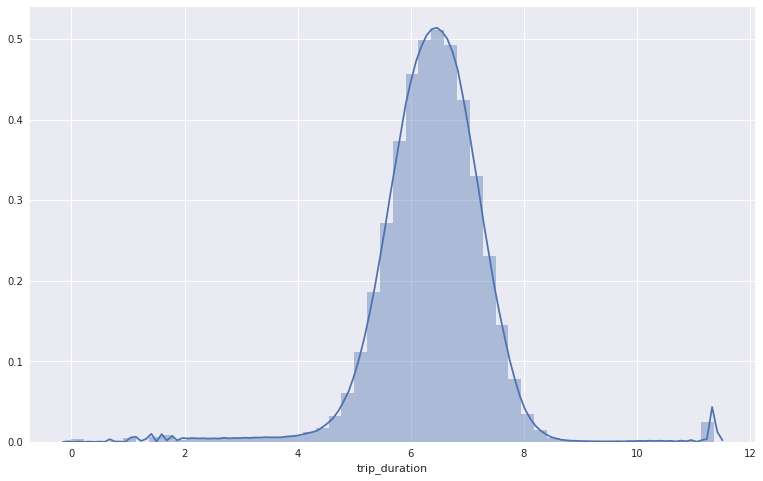

In [15]:
sns.distplot(df.trip_duration)

*Any trip duration greater than 6 hrs doesn't make sense and hence can be excluded*

In [16]:
df = df[( df.trip_duration > 5 ) & ( df.trip_duration < 9.5 )]

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


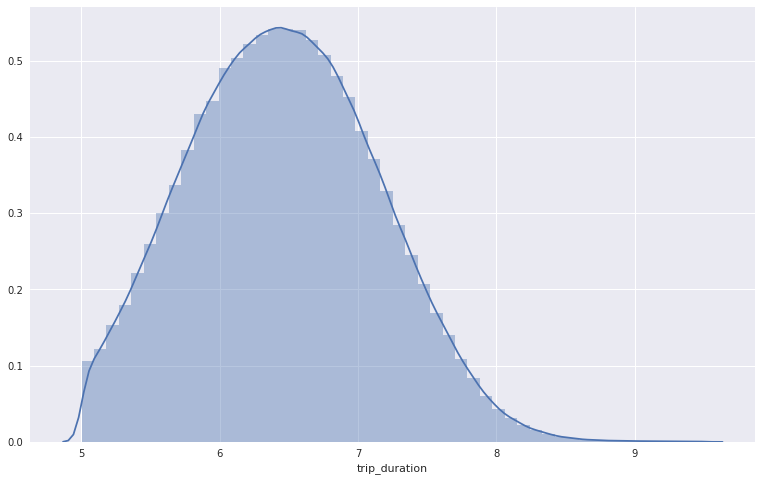

In [17]:
sns.distplot(df.trip_duration)

In [18]:
len(df)

1088688

In [184]:
tdf, y, nas = proc_df(df, 'trip_duration')

In [185]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 20000
n_trn = len(tdf)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(tdf, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((579113, 25), (579113,), (20000, 25))

In [186]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 2min 39s, sys: 192 ms, total: 2min 39s
Wall time: 46.3 s
Train RMS : 0.11438209085016006, Valid RMSE : 0.273517313297294,
                Train R2 score : 0.9715939877473648, Valid R2 score: 0.8457534240263364


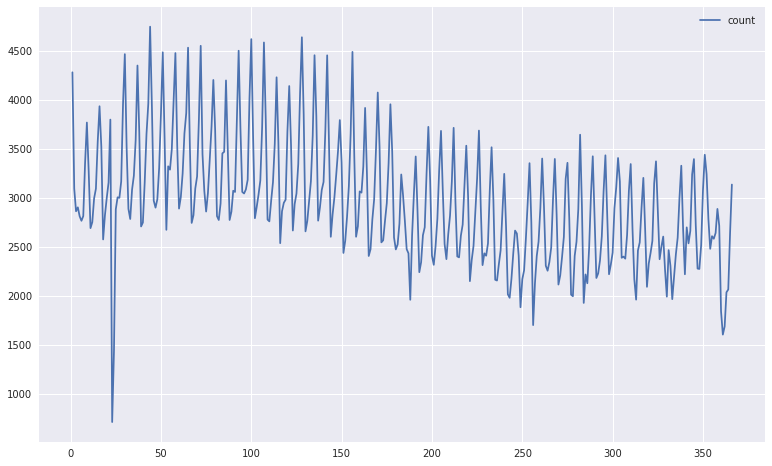

In [19]:
val_cnts = pd.DataFrame(df.lpep_pickup_datetimeDayofyear.value_counts(sort=False))
val_cnts.columns = ["count"]

val_cnts.plot()

# Adding Taxi Zones

In [20]:
taxi_zones = gpd.read_file("taxi_zones.shp")

taxi_zones.tail().T

258  \
OBJECTID                                                  259   
Shape_Leng                                            0.12675   
Shape_Area                                        0.000394552   
zone                                       Woodlawn/Wakefield   
LocationID                                                259   
borough                                                 Bronx   
geometry    POLYGON ((1025414.781960189 270986.1393638253,...   

                                                          259  \
OBJECTID                                                  260   
Shape_Leng                                           0.133514   
Shape_Area                                        0.000422345   
zone                                                 Woodside   
LocationID                                                260   
borough                                                Queens   
geometry    POLYGON ((1011466.966050446 216463.0052037984,...   

                                                          260  \
OBJECTID                                                  261   
Shape_Leng                                          0.0271205   
Shape_Area                                        3.43423e-05   
zone                                       World Trade Center   
LocationID                                                261   
borough                                             Manhattan   
geometry    POLYGON ((980555.2043112218 196138.486258477, ...   

                                                          261  \
OBJECTID                                                  262   
Shape_Leng                                          0.0490636   
Shape_Area                                         0.00012233   
zone                                           Yorkville East   
LocationID                                                262   
borough                                             Manhattan   
geometry    (POLYGON ((999804.7945504487 224498.5270484537...   

                                                          262  
OBJECTID                                                  263  
Shape_Leng                                          0.0370166  
Shape_Area                                        6.57698e-05  
zone                                           Yorkville West  
LocationID                                                263  
borough                                             Manhattan  
geometry    POLYGON ((997493.3227153122 220912.3861623257,...

In [21]:
taxi_zones.drop(columns = ["Shape_Leng", "Shape_Area", "OBJECTID"], inplace=True)

In [22]:
taxi_zones.tail()

zone  LocationID    borough  \
258  Woodlawn/Wakefield         259      Bronx   
259            Woodside         260     Queens   
260  World Trade Center         261  Manhattan   
261      Yorkville East         262  Manhattan   
262      Yorkville West         263  Manhattan   

                                              geometry  
258  POLYGON ((1025414.781960189 270986.1393638253,...  
259  POLYGON ((1011466.966050446 216463.0052037984,...  
260  POLYGON ((980555.2043112218 196138.486258477, ...  
261  (POLYGON ((999804.7945504487 224498.5270484537...  
262  POLYGON ((997493.3227153122 220912.3861623257,...

In [23]:
#Picking the Pickup and Dropoff coordinates for the first trip in our dataframe
vals = df[["Pickup_longitude","Pickup_latitude","Dropoff_longitude","Dropoff_latitude"]].iloc[0].values
vals

array([-73.95891,  40.71682, -73.93241,  40.70794])

(-74.28337047811291,
 -73.67222994897455,
 40.475144526078736,
 40.936503646094195)

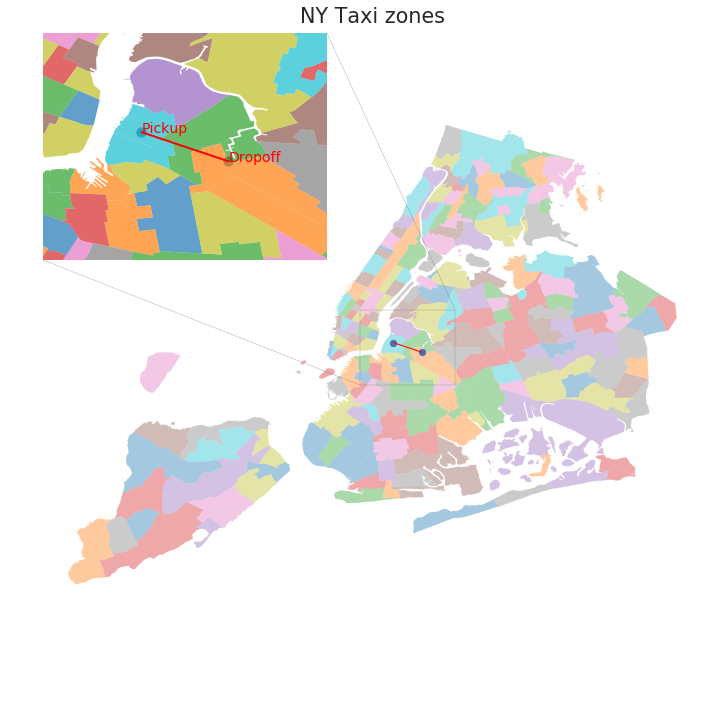

In [24]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

#Projecting Taxi Zones into WGS84 coordinate system
taxi_zones = taxi_zones.to_crs({'init': 'epsg:4326'})

f = ax
ax.set_xlim(min(src[0], target[0]) - 0.03, max(src[0], target[0]) + 0.03) # apply the x-limits
ax.set_ylim(min(src[1], target[1]) - 0.03, max(src[1], target[1]) + 0.03) # apply the y-limits

ax = taxi_zones.plot(column = "zone", figsize = (12, 12), alpha = 0.4)
ax.plot([vals[0], vals[2]], [vals[1], vals[3]], color = "red", linewidth=1) #Line
ax.scatter([vals[0], vals[2]], [vals[1], vals[3]], marker = 'o', s = 50) #Marker


axins = zoomed_inset_axes(ax, 3, loc=2)

axins.plot([vals[0], vals[2]], [vals[1], vals[3]], color = "red", linewidth=2)
axins.scatter([vals[0], vals[2]], [vals[1], vals[3]], marker = 'o', s = 100) #Markers
#Text at each marker
axins.text(vals[0], vals[1], s =  'Pickup', fontsize=14 ,color='r')
axins.text(vals[2], vals[3], s = 'Dropoff', fontsize=14, color='r')

axins.set_xlim(min(vals[0], vals[2]) - 0.03, max(vals[0], vals[2]) + 0.03) # apply the x-limits
axins.set_ylim(min(vals[1], vals[3]) - 0.03, max(vals[1], vals[3]) + 0.03) # apply the y-limits
axins.axis('off')

taxi_zones.plot(ax = axins, column = "zone", alpha = 0.7)

mark_inset(ax, axins, loc1=1, loc2=3, fc="none", ec="0.5")


ax.axis('off')
ax.set_title("NY Taxi zones", fontsize='xx-large')
ax.axis('equal')

In [25]:
taxi_zones["X"] = taxi_zones.centroid.x
taxi_zones["Y"] = taxi_zones.centroid.y

In [26]:
taxi_zones.tail()

zone  LocationID    borough  \
258  Woodlawn/Wakefield         259      Bronx   
259            Woodside         260     Queens   
260  World Trade Center         261  Manhattan   
261      Yorkville East         262  Manhattan   
262      Yorkville West         263  Manhattan   

                                              geometry          X          Y  
258  POLYGON ((-73.85107116191899 40.91037152011096... -73.852215  40.897932  
259  POLYGON ((-73.9017537339999 40.76077547499995,... -73.906306  40.744235  
260  POLYGON ((-74.01332610899989 40.7050307879999,... -74.013023  40.709139  
261  (POLYGON ((-73.94383256699986 40.7828590889999... -73.946510  40.775932  
262  POLYGON ((-73.95218621999996 40.7730198449999,... -73.951010  40.778766

### Spatial Join and Dataframe Paralleization 

In [25]:
def parallelize_dataframe(func, iterator):
    with Pool(num_cores) as pool:
        results = pd.concat(pool.map(func, iterator))
        return results     
    

In [31]:
from shapely.geometry import Point

def assign_taxi_zones(df, lon_var, lat_var, locid_var):

    try:
        local_gdf = gpd.GeoDataFrame(
            crs={'init': 'epsg:4326'},
            geometry=[Point(xy) for xy in
                      zip(df[lon_var], df[lat_var])])

        local_gdf = gpd.sjoin(
            local_gdf, taxi_zones, how='left', op='within')

        return local_gdf.LocationID.rename(locid_var)
    
    except ValueError as ve:
        print(ve)
        print(ve.stacktrace())
        series = np.nan
        return series

In [29]:
non_null_indices = df[~(df.DOLocationID.isna())].index
#df = df.loc[null_indices][["PULocationID", "DOLocationID"]]

df.loc[non_null_indices]["PULocationID"] = df.loc[non_null_indices]["PULocationID"].astype(int)
df.loc[non_null_indices]["DOLocationID"] = df.loc[non_null_indices]["DOLocationID"].astype(int)

In [30]:

df = pd.merge(df,  taxi_zones[["LocationID","X", "Y"]], how = "left", left_on = "PULocationID",  right_on = "LocationID")
df.Pickup_longitude.fillna(df.X, inplace=True)
df.Pickup_latitude.fillna(df.Y, inplace=True)


df.drop(columns=["LocationID", "X", "Y"], inplace=True)

df = pd.merge(df, taxi_zones[["LocationID","X", "Y"]], how = "left", left_on = "DOLocationID",  right_on = "LocationID")

df.Dropoff_longitude.fillna(df.X, inplace=True)
df.Dropoff_latitude.fillna(df.Y, inplace=True)

df.drop(columns=["LocationID", "X", "Y"], inplace=True)


df.tail().T

1093828     1093829     1093830  \
Pickup_longitude                        -73.9457    -73.9461    -73.9458   
Pickup_latitude                          40.8075     40.6802     40.8076   
Dropoff_longitude                       -73.9253    -73.9492    -73.9572   
Dropoff_latitude                          40.818     40.6951      40.806   
Trip_distance                                1.6           1         0.9   
PULocationID                                 NaN         NaN         NaN   
DOLocationID                                 NaN         NaN         NaN   
trip_duration                            6.70073     5.78383     5.56068   
lpep_pickup_datetimeYear                    2016        2016        2016   
lpep_pickup_datetimeMonth                      5           5           5   
lpep_pickup_datetimeWeek                      18          18          18   
lpep_pickup_datetimeDay                        7           7           7   
lpep_pickup_datetimeDayofweek                  5           5           5   
lpep_pickup_datetimeDayofyear                128         128         128   
lpep_pickup_datetimeIs_month_end           False       False       False   
lpep_pickup_datetimeIs_month_start         False       False       False   
lpep_pickup_datetimeIs_quarter_end         False       False       False   
lpep_pickup_datetimeIs_quarter_start       False       False       False   
lpep_pickup_datetimeIs_year_end            False       False       False   
lpep_pickup_datetimeIs_year_start          False       False       False   
lpep_pickup_datetimeHour                      16          16          16   
lpep_pickup_datetimeMinute                    24          20          20   
lpep_pickup_datetimeSecond                     5          59          50   
lpep_pickup_datetimeElapsed           1462638245  1462638059  1462638050   

                                         1093831     1093832  
Pickup_longitude                         -73.963     -73.962  
Pickup_latitude                          40.7119      40.716  
Dropoff_longitude                       -73.9174    -73.9569  
Dropoff_latitude                         40.6987     40.6736  
Trip_distance                               3.37        3.31  
PULocationID                                 NaN         NaN  
DOLocationID                                 NaN         NaN  
trip_duration                            6.96224     6.52796  
lpep_pickup_datetimeYear                    2016        2016  
lpep_pickup_datetimeMonth                      5           5  
lpep_pickup_datetimeWeek                      18          18  
lpep_pickup_datetimeDay                        7           7  
lpep_pickup_datetimeDayofweek                  5           5  
lpep_pickup_datetimeDayofyear                128         128  
lpep_pickup_datetimeIs_month_end           False       False  
lpep_pickup_datetimeIs_month_start         False       False  
lpep_pickup_datetimeIs_quarter_end         False       False  
lpep_pickup_datetimeIs_quarter_start       False       False  
lpep_pickup_datetimeIs_year_end            False       False  
lpep_pickup_datetimeIs_year_start          False       False  
lpep_pickup_datetimeHour                       2           2  
lpep_pickup_datetimeMinute                     2          24  
lpep_pickup_datetimeSecond                    17          26  
lpep_pickup_datetimeElapsed           1462586537  1462587866

In [32]:
df['pickup_taxizone_id'] =  assign_taxi_zones(df, "Pickup_longitude","Pickup_latitude", "pickup_taxizone_id")
df['dropoff_taxizone_id'] = assign_taxi_zones(df, "Dropoff_longitude","Dropoff_latitude","dropoff_taxizone_id")
df.tail().T

1093828     1093829     1093830  \
Pickup_longitude                        -73.9457    -73.9461    -73.9458   
Pickup_latitude                          40.8075     40.6802     40.8076   
Dropoff_longitude                       -73.9253    -73.9492    -73.9572   
Dropoff_latitude                          40.818     40.6951      40.806   
Trip_distance                                1.6           1         0.9   
PULocationID                                 NaN         NaN         NaN   
DOLocationID                                 NaN         NaN         NaN   
trip_duration                            6.70073     5.78383     5.56068   
lpep_pickup_datetimeYear                    2016        2016        2016   
lpep_pickup_datetimeMonth                      5           5           5   
lpep_pickup_datetimeWeek                      18          18          18   
lpep_pickup_datetimeDay                        7           7           7   
lpep_pickup_datetimeDayofweek                  5           5           5   
lpep_pickup_datetimeDayofyear                128         128         128   
lpep_pickup_datetimeIs_month_end           False       False       False   
lpep_pickup_datetimeIs_month_start         False       False       False   
lpep_pickup_datetimeIs_quarter_end         False       False       False   
lpep_pickup_datetimeIs_quarter_start       False       False       False   
lpep_pickup_datetimeIs_year_end            False       False       False   
lpep_pickup_datetimeIs_year_start          False       False       False   
lpep_pickup_datetimeHour                      16          16          16   
lpep_pickup_datetimeMinute                    24          20          20   
lpep_pickup_datetimeSecond                     5          59          50   
lpep_pickup_datetimeElapsed           1462638245  1462638059  1462638050   
pickup_taxizone_id                            41          61          41   
dropoff_taxizone_id                          168          17          41   

                                         1093831     1093832  
Pickup_longitude                         -73.963     -73.962  
Pickup_latitude                          40.7119      40.716  
Dropoff_longitude                       -73.9174    -73.9569  
Dropoff_latitude                         40.6987     40.6736  
Trip_distance                               3.37        3.31  
PULocationID                                 NaN         NaN  
DOLocationID                                 NaN         NaN  
trip_duration                            6.96224     6.52796  
lpep_pickup_datetimeYear                    2016        2016  
lpep_pickup_datetimeMonth                      5           5  
lpep_pickup_datetimeWeek                      18          18  
lpep_pickup_datetimeDay                        7           7  
lpep_pickup_datetimeDayofweek                  5           5  
lpep_pickup_datetimeDayofyear                128         128  
lpep_pickup_datetimeIs_month_end           False       False  
lpep_pickup_datetimeIs_month_start         False       False  
lpep_pickup_datetimeIs_quarter_end         False       False  
lpep_pickup_datetimeIs_quarter_start       False       False  
lpep_pickup_datetimeIs_year_end            False       False  
lpep_pickup_datetimeIs_year_start          False       False  
lpep_pickup_datetimeHour                       2           2  
lpep_pickup_datetimeMinute                     2          24  
lpep_pickup_datetimeSecond                    17          26  
lpep_pickup_datetimeElapsed           1462586537  1462587866  
pickup_taxizone_id                           256         255  
dropoff_taxizone_id                           36          61

In [33]:
df.PULocationID.fillna(df.pickup_taxizone_id, inplace=True)
df.DOLocationID.fillna(df.dropoff_taxizone_id, inplace=True)
df.drop(columns=["pickup_taxizone_id", "dropoff_taxizone_id"], inplace=True)


In [34]:
df = pd.merge(df, taxi_zones[["LocationID","borough"]], how = "left", left_on = "PULocationID",  right_on = "LocationID")

df.rename({"borough" : "pickup_borough"}, axis = 1, inplace=True)

df.drop(columns=["LocationID"], inplace = True)


df = pd.merge(df, taxi_zones[["LocationID","borough"]], how = "left",  left_on = "DOLocationID",  right_on = "LocationID")

df.rename({"borough" : "dropoff_borough"}, axis = 1, inplace=True)

df.drop(columns=["LocationID"], inplace = True)


df.tail().T

1110646     1110647     1110648  \
Pickup_longitude                        -73.9457    -73.9461    -73.9458   
Pickup_latitude                          40.8075     40.6802     40.8076   
Dropoff_longitude                       -73.9253    -73.9492    -73.9572   
Dropoff_latitude                          40.818     40.6951      40.806   
Trip_distance                                1.6           1         0.9   
PULocationID                                  41          61          41   
DOLocationID                                 168          17          41   
trip_duration                            6.70073     5.78383     5.56068   
lpep_pickup_datetimeYear                    2016        2016        2016   
lpep_pickup_datetimeMonth                      5           5           5   
lpep_pickup_datetimeWeek                      18          18          18   
lpep_pickup_datetimeDay                        7           7           7   
lpep_pickup_datetimeDayofweek                  5           5           5   
lpep_pickup_datetimeDayofyear                128         128         128   
lpep_pickup_datetimeIs_month_end           False       False       False   
lpep_pickup_datetimeIs_month_start         False       False       False   
lpep_pickup_datetimeIs_quarter_end         False       False       False   
lpep_pickup_datetimeIs_quarter_start       False       False       False   
lpep_pickup_datetimeIs_year_end            False       False       False   
lpep_pickup_datetimeIs_year_start          False       False       False   
lpep_pickup_datetimeHour                      16          16          16   
lpep_pickup_datetimeMinute                    24          20          20   
lpep_pickup_datetimeSecond                     5          59          50   
lpep_pickup_datetimeElapsed           1462638245  1462638059  1462638050   
pickup_borough                         Manhattan    Brooklyn   Manhattan   
dropoff_borough                            Bronx    Brooklyn   Manhattan   

                                         1110649     1110650  
Pickup_longitude                         -73.963     -73.962  
Pickup_latitude                          40.7119      40.716  
Dropoff_longitude                       -73.9174    -73.9569  
Dropoff_latitude                         40.6987     40.6736  
Trip_distance                               3.37        3.31  
PULocationID                                 256         255  
DOLocationID                                  36          61  
trip_duration                            6.96224     6.52796  
lpep_pickup_datetimeYear                    2016        2016  
lpep_pickup_datetimeMonth                      5           5  
lpep_pickup_datetimeWeek                      18          18  
lpep_pickup_datetimeDay                        7           7  
lpep_pickup_datetimeDayofweek                  5           5  
lpep_pickup_datetimeDayofyear                128         128  
lpep_pickup_datetimeIs_month_end           False       False  
lpep_pickup_datetimeIs_month_start         False       False  
lpep_pickup_datetimeIs_quarter_end         False       False  
lpep_pickup_datetimeIs_quarter_start       False       False  
lpep_pickup_datetimeIs_year_end            False       False  
lpep_pickup_datetimeIs_year_start          False       False  
lpep_pickup_datetimeHour                       2           2  
lpep_pickup_datetimeMinute                     2          24  
lpep_pickup_datetimeSecond                    17          26  
lpep_pickup_datetimeElapsed           1462586537  1462587866  
pickup_borough                          Brooklyn    Brooklyn  
dropoff_borough                         Brooklyn    Brooklyn

In [66]:
len(df)

635226

In [201]:
train_cats(df)

In [202]:
tdf, y, nas = proc_df(df, 'trip_duration')

In [203]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_valid = 20000
n_trn = len(tdf)-n_valid
raw_train, raw_valid = split_vals(df, n_trn)
X_train, X_valid = split_vals(tdf, n_trn)
y_train, y_valid = split_vals(y, n_trn)

X_train.shape, y_train.shape, X_valid.shape

((582718, 29), (582718,), (20000, 29))

In [42]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

Train RMS : 0.09880475531046715, Valid RMSE : 0.2599229455143868,
                Train R2 score : 0.9786976405479708, Valid R2 score: 0.8602128925971101OOB Score : 0.8480746084914459


In [ ]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

In [206]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([5.7376 , 5.98027, 5.84946, 6.07379, 5.83006, 6.14319, 5.50377, 6.34913, 5.59438, 6.4391 , 5.73143,
        5.88606, 6.13323, 6.60402, 6.15025, 5.80589, 5.70721, 5.91291, 5.9523 , 5.86067, 6.10191, 5.9423 ,
        5.91118, 5.9069 , 5.64182, 5.87235, 5.52464, 6.2091 , 5.54754, 5.94511, 5.84109, 5.55949, 5.7278 ,
        5.51631, 5.92286, 6.10337, 5.47752, 5.85338, 5.65913, 5.80828]),
 5.882920632655627,
 5.356586274672012)

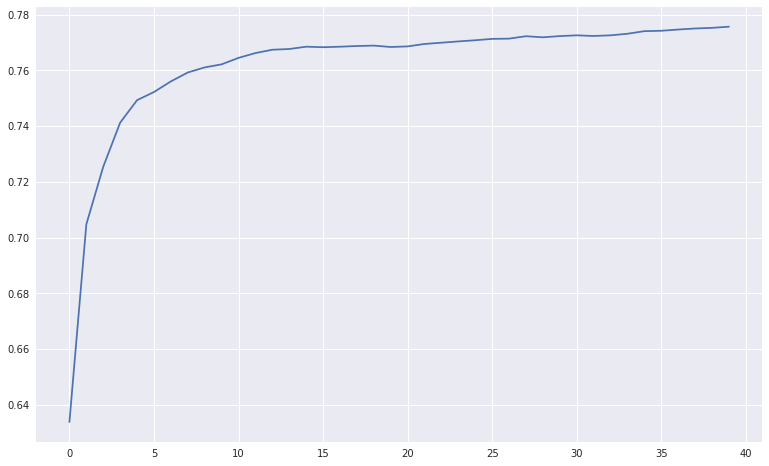

In [207]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(40)]);

In [44]:
fi = rf_feat_importance(m, X_train); fi

cols       imp
4                          Trip_distance  0.539549
25                        haversine_dist  0.185695
26                        manhattan_dist  0.115578
19              lpep_pickup_datetimeHour  0.036124
2                      Dropoff_longitude  0.019791
3                       Dropoff_latitude  0.016847
1                        Pickup_latitude  0.012517
0                       Pickup_longitude  0.011310
11         lpep_pickup_datetimeDayofweek  0.009518
20            lpep_pickup_datetimeMinute  0.007038
22           lpep_pickup_datetimeElapsed  0.006827
21            lpep_pickup_datetimeSecond  0.006750
6                           DOLocationID  0.006476
10               lpep_pickup_datetimeDay  0.006013
12         lpep_pickup_datetimeDayofyear  0.005086
5                           PULocationID  0.005033
9               lpep_pickup_datetimeWeek  0.003394
24                       dropoff_borough  0.002745
8              lpep_pickup_datetimeMonth  0.001404
23                        pickup_borough  0.001258
32                     manhattan_dist_na  0.000427
31                     haversine_dist_na  0.000254
30                   Dropoff_latitude_na  0.000144
13      lpep_pickup_datetimeIs_month_end  0.000076
14    lpep_pickup_datetimeIs_month_start  0.000049
15    lpep_pickup_datetimeIs_quarter_end  0.000030
16  lpep_pickup_datetimeIs_quarter_start  0.000025
29                  Dropoff_longitude_na  0.000022
27                   Pickup_longitude_na  0.000009
18     lpep_pickup_datetimeIs_year_start  0.000008
28                    Pickup_latitude_na  0.000004
17       lpep_pickup_datetimeIs_year_end  0.000002
7               lpep_pickup_datetimeYear  0.000000

In [50]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,8), legend=False, grid = False)

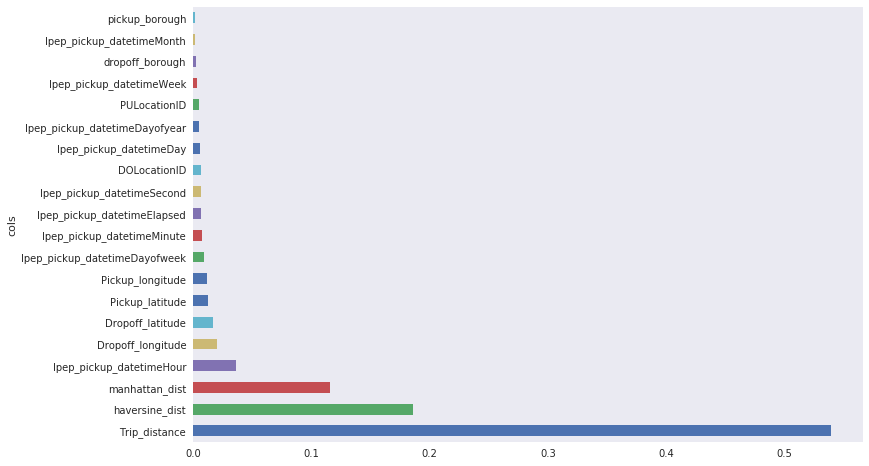

In [51]:
plot_fi(fi[:20]);

In [52]:
to_keep = fi[fi.imp>1e-3].cols; len(to_keep)

20

In [53]:
df_keep = tdf[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [213]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=5, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

Train RMS : 0.17039141160828364, Valid RMSE : 0.30508930906097315,
                Train R2 score : 0.9365196940800771, Valid R2 score: 0.7916392778194754OOB Score : 0.8579330841443042


In [54]:
from scipy.cluster import hierarchy as hc


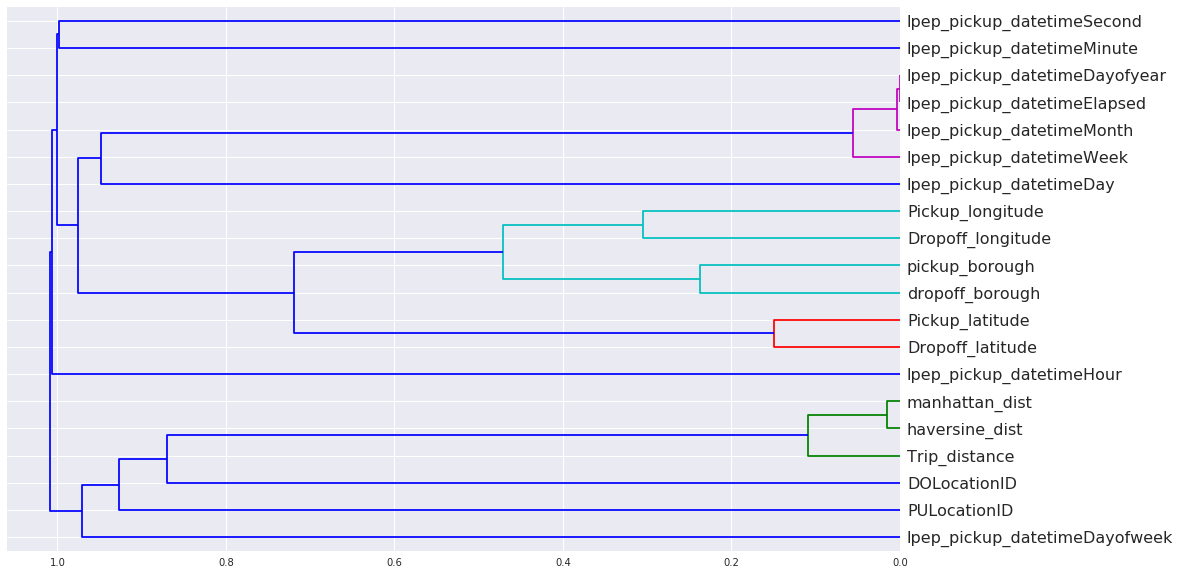

In [55]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [56]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, 
           max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [57]:
get_oob(df_keep)

0.8525535774012679

In [58]:
for c in ('haversine_dist', 'manhattan_dist' ,'lpep_pickup_datetimeDayofyear', 
  'lpep_pickup_datetimeElapsed',
  'lpep_pickup_datetimeMonth'):
    print(c, get_oob(df_keep.drop(c, axis=1)))

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


haversine_dist 0.8527894584801484


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


manhattan_dist 0.853053682267824


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


lpep_pickup_datetimeDayofyear 0.8521976083174386
lpep_pickup_datetimeElapsed 0.8524607429681185
lpep_pickup_datetimeMonth 0.8523307565970708


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


In [220]:
to_drop = ['manhattan_dist', 'lpep_pickup_datetimeElapsed']
get_oob(df_keep.drop(to_drop, axis=1))

0.8564672801554589

In [226]:
X_train, X_valid = split_vals(df_keep, n_trn)
np.save('keep_cols.npy', np.array(df_keep.columns))
keep_cols = np.load('keep_cols.npy')
df_keep = tdf[keep_cols]

In [227]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

Train RMS : 0.14274155017874507, Valid RMSE : 0.3047424907726291,
                Train R2 score : 0.9554503365902474, Valid R2 score: 0.7921127276144841OOB Score : 0.8583902999840405
